In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as sparse_linalg
import scipy.signal
import scipy
from scipy.fft import fft, fftfreq

#plot packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
import matplotlib.animation as animation

from matplotlib import cm
#additional
import time

# multiprocessing lib
import multiprocessing
import multiprocessing.pool
import itertools
from itertools import repeat
from qrw_functions import *

In [13]:
state_index_array = [0, 4]
conditions = [0.8, 0.95]
system_sizes = np.arange(30,61,2)
radius_eigstat_0_condi_1 = np.zeros(len(system_sizes))  # first pair of trapped state: states 0 and -1, condition 1:0.8
radius_eigstat_0_condi_2 = np.zeros(len(system_sizes))  # first pair of trapped state: states 0 and -1, condition 2:0.95
radius_eigstat_4_condi_1 = np.zeros(len(system_sizes))  # second pair of trapped state: state 4 and -5, condition 1:0.8
radius_eigstat_4_condi_2 = np.zeros(len(system_sizes))  # second pair of trapped state: state 4 and -5, condition 2:0.95


In [14]:
conditions = [0.8, 0.95]

for i in range(2):
    state_indxs = i
    for j in range(2):
        condition = conditions[j]

        result = np.zeros(len(system_sizes)) 
        for k in range(len(system_sizes)):    
            result[k] = get_radius(state_indxs, system_sizes[k], condition)
        np.save("data_radius/data_radius_size_state{}_condi{}.npy".format(state_indxs, condition), result)  

radius is 24 given condition 0.8
radius is 18 given condition 0.8
radius is 10 given condition 0.8
radius is 10 given condition 0.8
radius is 10 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 9 given condition 0.8
radius is 26 given condition 0.95
radius is 26 given condition 0.95
radius is 26 given condition 0.95
radius is 25 given condition 0.95
radius is 23 given condition 0.95
radius is 20 given condition 0.95
radius is 18 given condition 0.95
radius is 18 given condition 0.95
radius is 18 given condition 0.95
radius is 18 given condition 0.95
radius is 18 given condition 0.95
radius is 18 given condition 0.95
radius is 18 given condition 0.95
radius is 17 given condition 0.95
radius 

In [15]:
np.save("data_radius/data_system_size.npy", system_sizes)

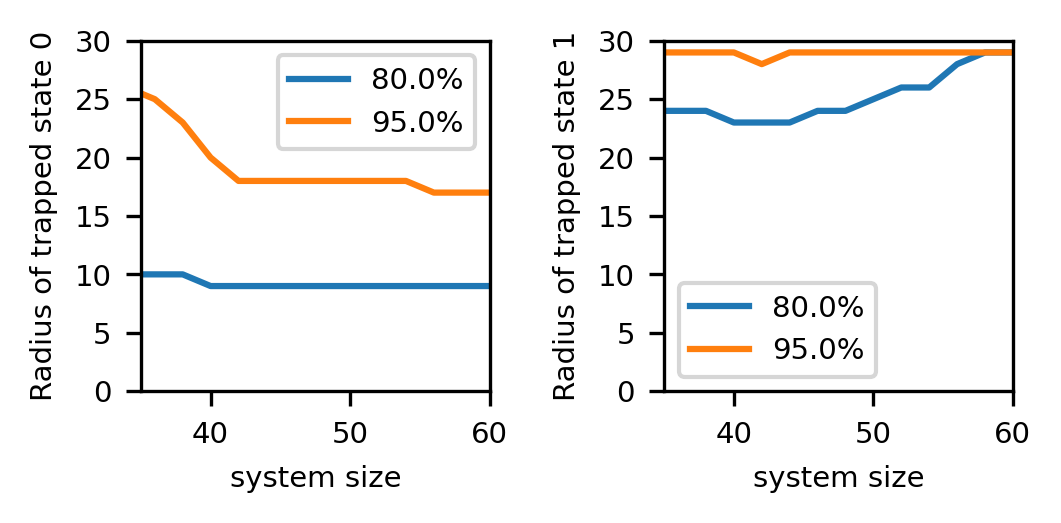

In [45]:
# plot
fig, axes = plt.subplots(ncols=2, nrows=1, dpi=300,sharex=True, sharey = False)
fig.set_size_inches(3.4, 1.6)
font = {'size' : 7}
mpl.rc('font', **font)

fig.subplots_adjust(bottom = 0.22, top=0.95, left=0.12, right=0.975, wspace=0.5)

##############################################################################
system_sizes = np.load("data_radius/data_system_size.npy")
for i in range(2):
    state_indxs = i
    for j in range(2):
        condition = conditions[j]
        data = np.load("data_radius/data_radius_size_state{}_condi{}.npy".format(state_indxs, condition))
        axes[i].plot(system_sizes, data, label = "{}%".format(condition*100))
        axes[i].set_ylabel(r"Radius of trapped state {}".format(state_indxs))
        axes[i].set_xlabel("system size")
        axes[i].set_ylim(0,30)
        axes[i].set_xlim(35,60)
        
        axes[i].legend()

plt.savefig("radius_system_size.pdf")

In [37]:
get_radius(4, 60, 0.8)